In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi

In [3]:
x_i_var = 0.1
y_i_var = 0.1
h_f = 200

In [2]:
def sample_normal_distribution(b):
    """
    sample normal distribution with 0 mean, variance b
    """
    rand = np.random.uniform(low=-1.0, high=1.0, size=12)
    return b * np.sum(rand) / 6

In [4]:
def sample_marker_model(marker_global, marker_img):
    """
    Sample marker model to get robot pose in global frame 
    given marker pose in global frame & in image plane
    Input:
        marker_global (np.ndarray), shape 3,
        marker_img (np.ndarray), shape 3,
    Output:
        robot_global (np.ndarray), shape 3,
    """
    x_m, y_m, theta_m = marker_global
    x_i, y_i, theta_i = marker_img
    # robot orientation
    theta_r = theta_m - theta_i
    k = np.random.randint(low=0, high=4)
    theta_r += k*pi/2
    # location
    x_i_hat = x_i + sample_normal_distribution(x_i_var)
    y_i_hat = y_i + sample_normal_distribution(y_i_var)
    x_r = x_m - h_f * (x_i * cos(theta_r) - y_i * sin(theta_r))
    y_r = y_m - h_f * (x_i * sin(theta_r) + y_i * cos(theta_r))
    
    return np.array([x_r, y_r, theta_r]) 

In [10]:
marker_global = np.zeros(3)
marker_img = np.array([2., 0., pi/4])
robot_pose = [sample_marker_model(marker_global, marker_img) for i in range(1000)]

In [13]:
def plot_sample(x_t, length=1.):
    """
    Plot a pose
    """
    x, y, theta = x_t
    x_tip = x + length * cos(theta)
    y_tip = y + length * sin(theta)
    plt.plot([x, x_tip], [y, y_tip], 'k-')

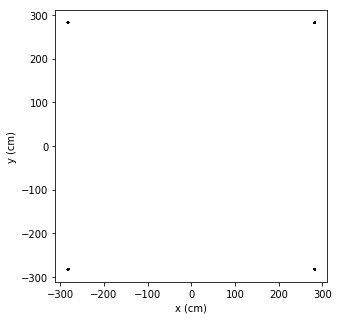

In [14]:
plt.figure(figsize=(5,5))
# plt.xlim(0., 2.)
# plt.ylim(0., 2.)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
for x_t in robot_pose:
    plot_sample(x_t)